we will focus on providing a basic recommendation system by suggesting moveies that are most similar to a particular movie.

In [30]:
import pandas as pd
import numpy as np

In [31]:
# Get Data

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

In [32]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [33]:
movie_titles = pd.read_csv("ml-100k/u.item", sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [34]:
movie_titles[movie_titles["item_id"] == 242]

,item_id,title
241,242,Kolya (1996)


In [35]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


# Visualization Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [37]:
# use groupby to get average rating for each movie/item
g = df.groupby("title")
g['rating'].mean().sort_values(ascending=False)

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
                                                    ... 
Pharaoh's Army (1995)                                1.0
August (1996)                                        1.0
Babyfever (1994)                                     1.0
Amityville: A New Generation (1993)                  1.0
Woman in Question, The (1950)                        1.0
Name: rating, Length: 1664, dtype: float64

In [38]:
# use groupby to get count of ratings for each movie/item
g['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [40]:
# Group by movie title and calculate average rating and rating count
movie_stats = df.groupby("item_id")['rating'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
movie_stats.columns = ['item_id', 'average_rating', 'rating_count']

# Display the result
print(movie_stats.head())


   item_id  average_rating  rating_count
0        1        3.878319           452
1        2        3.206107           131
2        3        3.033333            90
3        4        3.550239           209
4        5        3.302326            86


In [28]:
pd.merge(movie_stats,movie_titles,on='item_id')

,item_id,average_rating,rating_count,title
0,1,3.878319,452,Toy Story (1995)
1,2,3.206107,131,GoldenEye (1995)
2,3,3.033333,90,Four Rooms (1995)
3,4,3.550239,209,Get Shorty (1995)
4,5,3.302326,86,Copycat (1995)
...,...,...,...,...
1677,1678,1.000000,1,Mat' i syn (1997)
1678,1679,3.000000,1,B. Monkey (1998)
1679,1680,2.000000,1,Sliding Doors (1998)
1680,1681,3.000000,1,You So Crazy (1994)


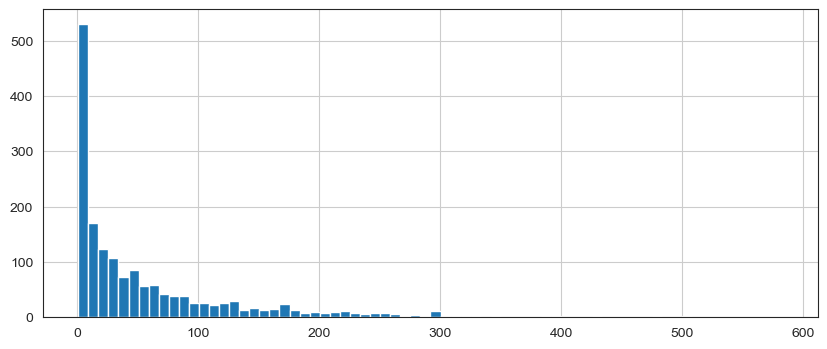

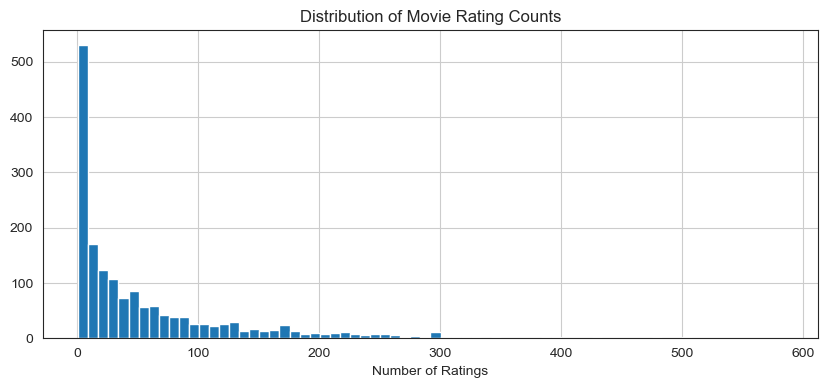

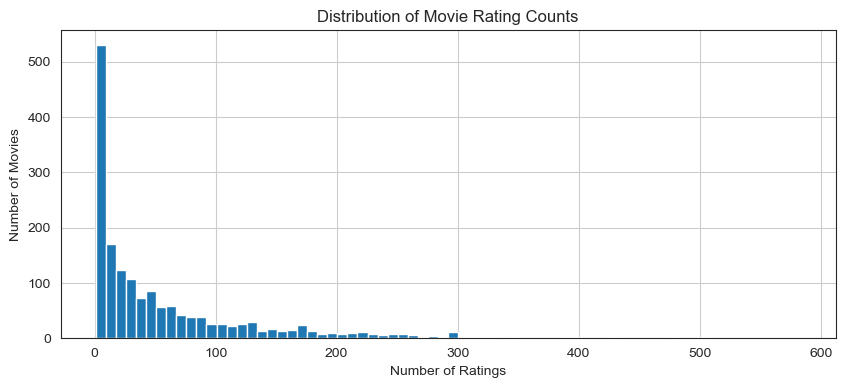

In [45]:
plt.figure(figsize=(10,4))
movie_stats['rating_count'].hist(bins=70)
plt.title('Distribution of Movie Rating Counts')
plt.xlabel('Number of Ratings') 
plt.ylabel('Number of Movies')
plt.show()  

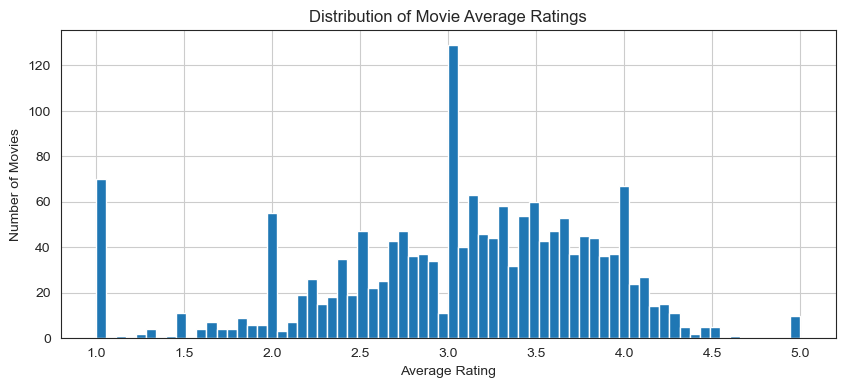

In [49]:
plt.figure(figsize=(10,4))
movie_stats['average_rating'].hist(bins=70)
plt.title('Distribution of Movie Average Ratings')
plt.xlabel('Average Rating')    
plt.ylabel('Number of Movies')
plt.show() 

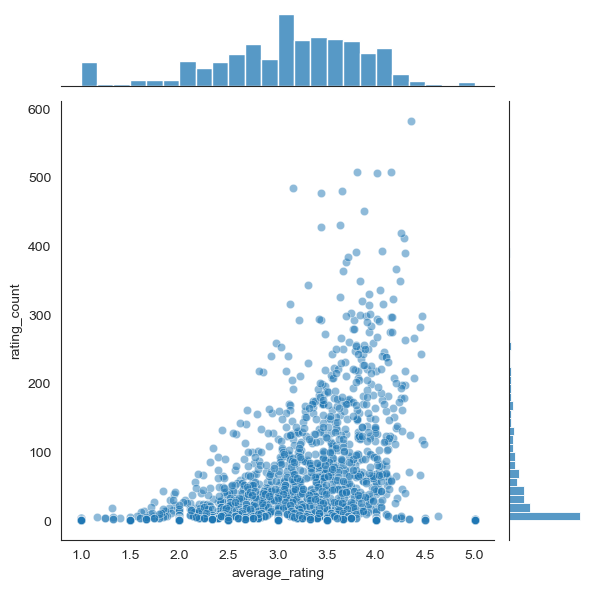

In [52]:
sns.jointplot(x='average_rating',y='rating_count',data=movie_stats,alpha=0.5)
plt.show()

In [53]:
moviemat = df.pivot_table(index='user_id',columns='item_id',values='rating')
moviemat.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
